# Heart Disease Prediction: Saving lives using ML
Heart disease is the leading cause of death for people of most racial and ethnic groups in the United States, including African American, American Indian, Alaska Native, Hispanic, and white men. For women from the Pacific Islands and Asian American, American Indian, Alaska Native, and Hispanic women, heart disease is second only to cancer.

* One person dies every 37 seconds just in the United States alone from cardiovascular disease.
* About 647,000 Americans die from heart disease each year—that’s 1 in every 4 deaths.
* Heart disease costs the United States about $219 billion each year from 2014 to 2015. This includes the cost of health care services, medicines, and lost productivity due to death.


## 1. Problem Definition

* Complete analysis of Heart Disease UCI dataset.
* To predict whether a person has a heart disease or not based on the various biological and physical parameters. 

## 2. Collecting Data
The data used for training and testing is the [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) downloaded from Kaggle.  
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=2)

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Exploratory Data Analysis
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
data.mean()

age         54.37
sex          0.68
cp           0.97
trestbps   131.62
chol       246.26
fbs          0.15
restecg      0.53
thalach    149.65
exang        0.33
oldpeak      1.04
slope        1.40
ca           0.73
thal         2.31
target       0.54
dtype: float64

In [6]:
categorical_values = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_values.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [7]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

## 4. Data Visualization
Now let see various visual representations of the data to understand more about relationship between various feautures.

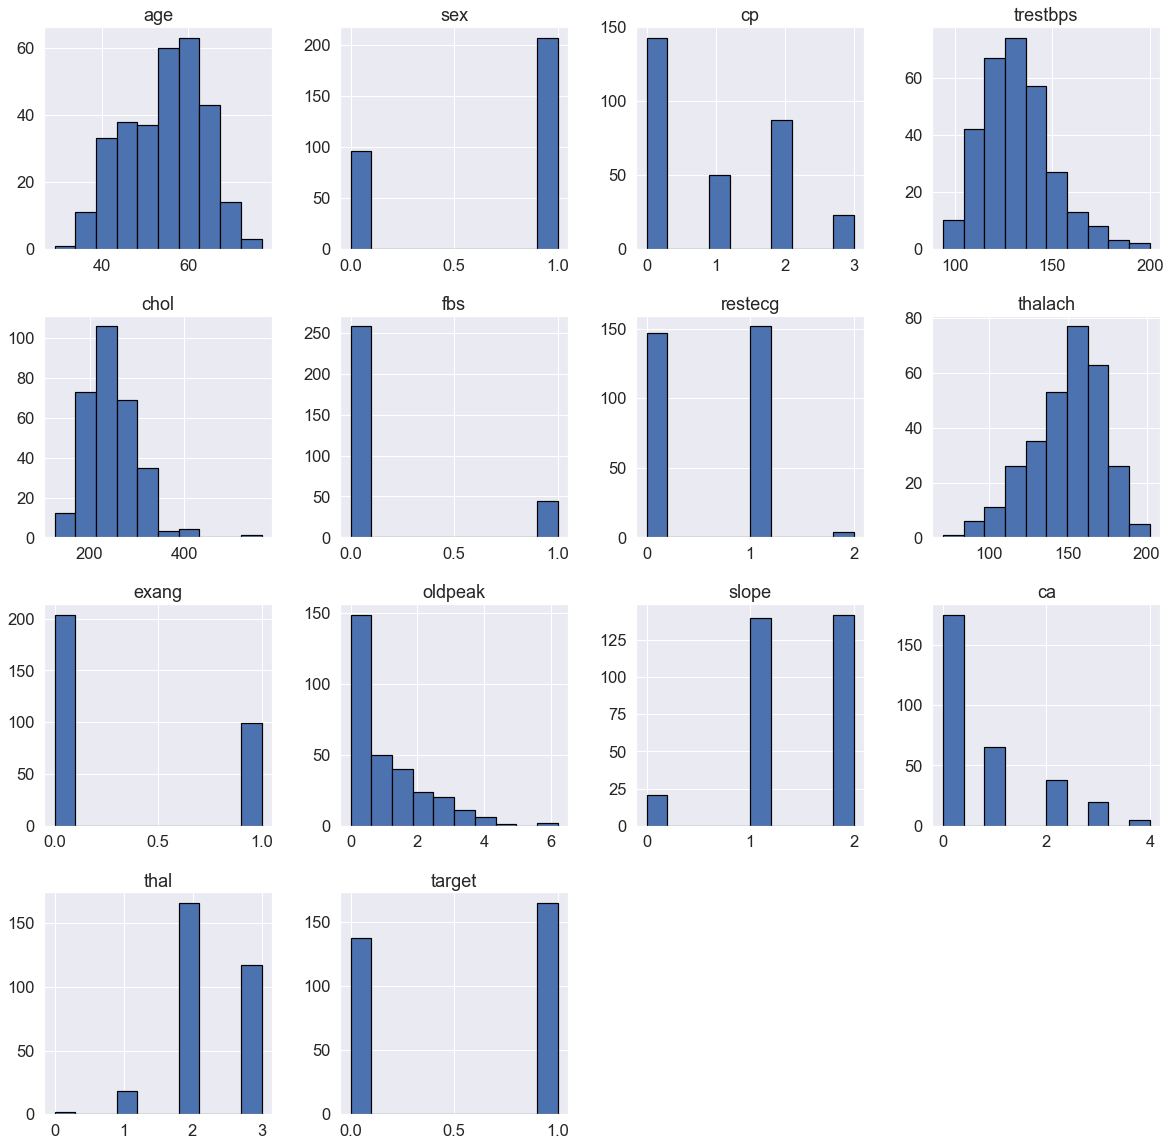

In [8]:
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

C:\Users\sahil kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sahil kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


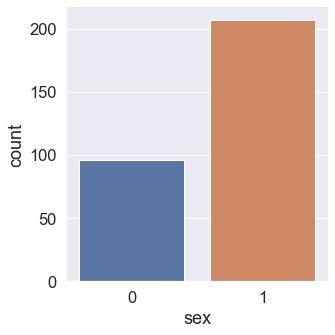

In [9]:
sns.factorplot('sex', data=data, kind='count')

C:\Users\sahil kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sahil kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


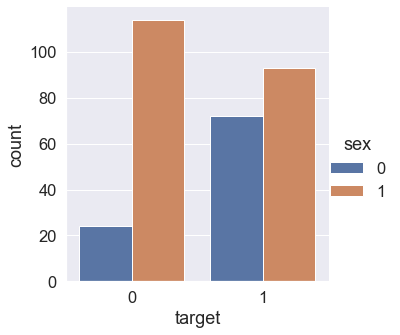

In [10]:
sns.factorplot('target', data=data, hue='sex', kind='count')

C:\Users\sahil kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sahil kumar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


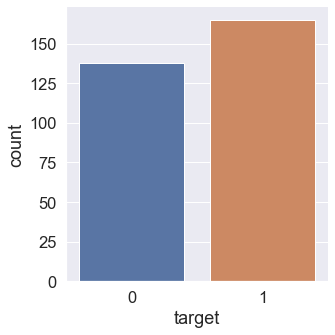

In [11]:
sns.factorplot('target', data=data, kind='count')

<AxesSubplot:>

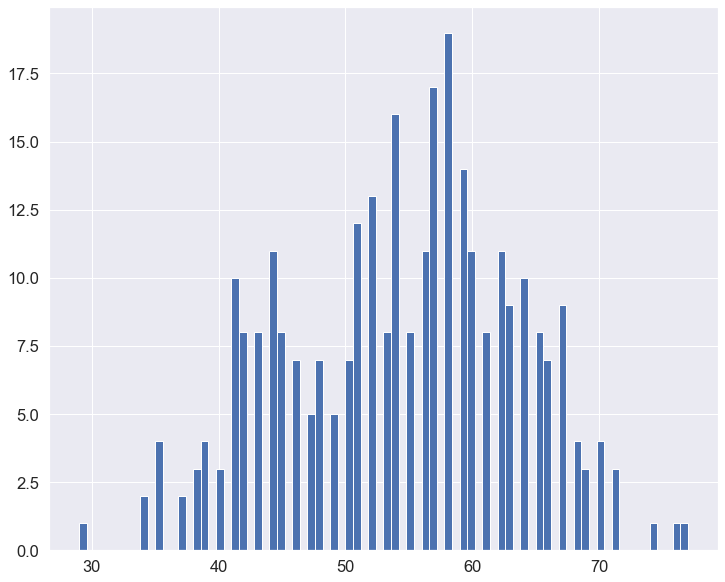

In [12]:
plt.figure(figsize=(12, 10))
data.age.hist(bins=80)

In [13]:
print(f"The most of the patients have a mean age of : {data.age.mean()}")

The most of the patients have a mean age of : 54.366336633663366


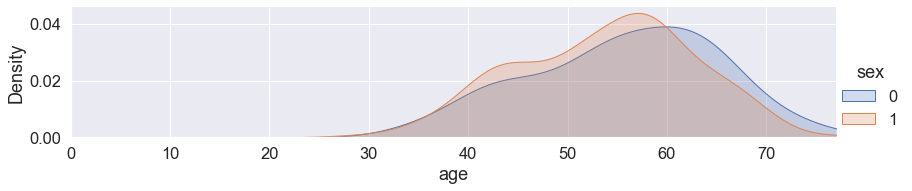

In [14]:
fig = sns.FacetGrid(data, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

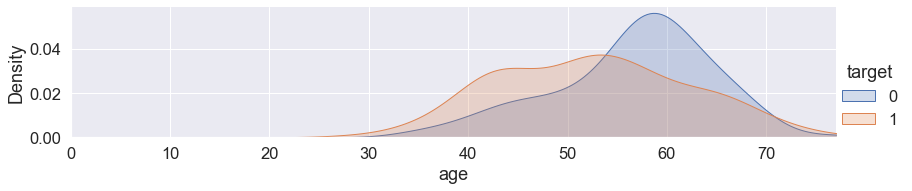

In [15]:
fig = sns.FacetGrid(data, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

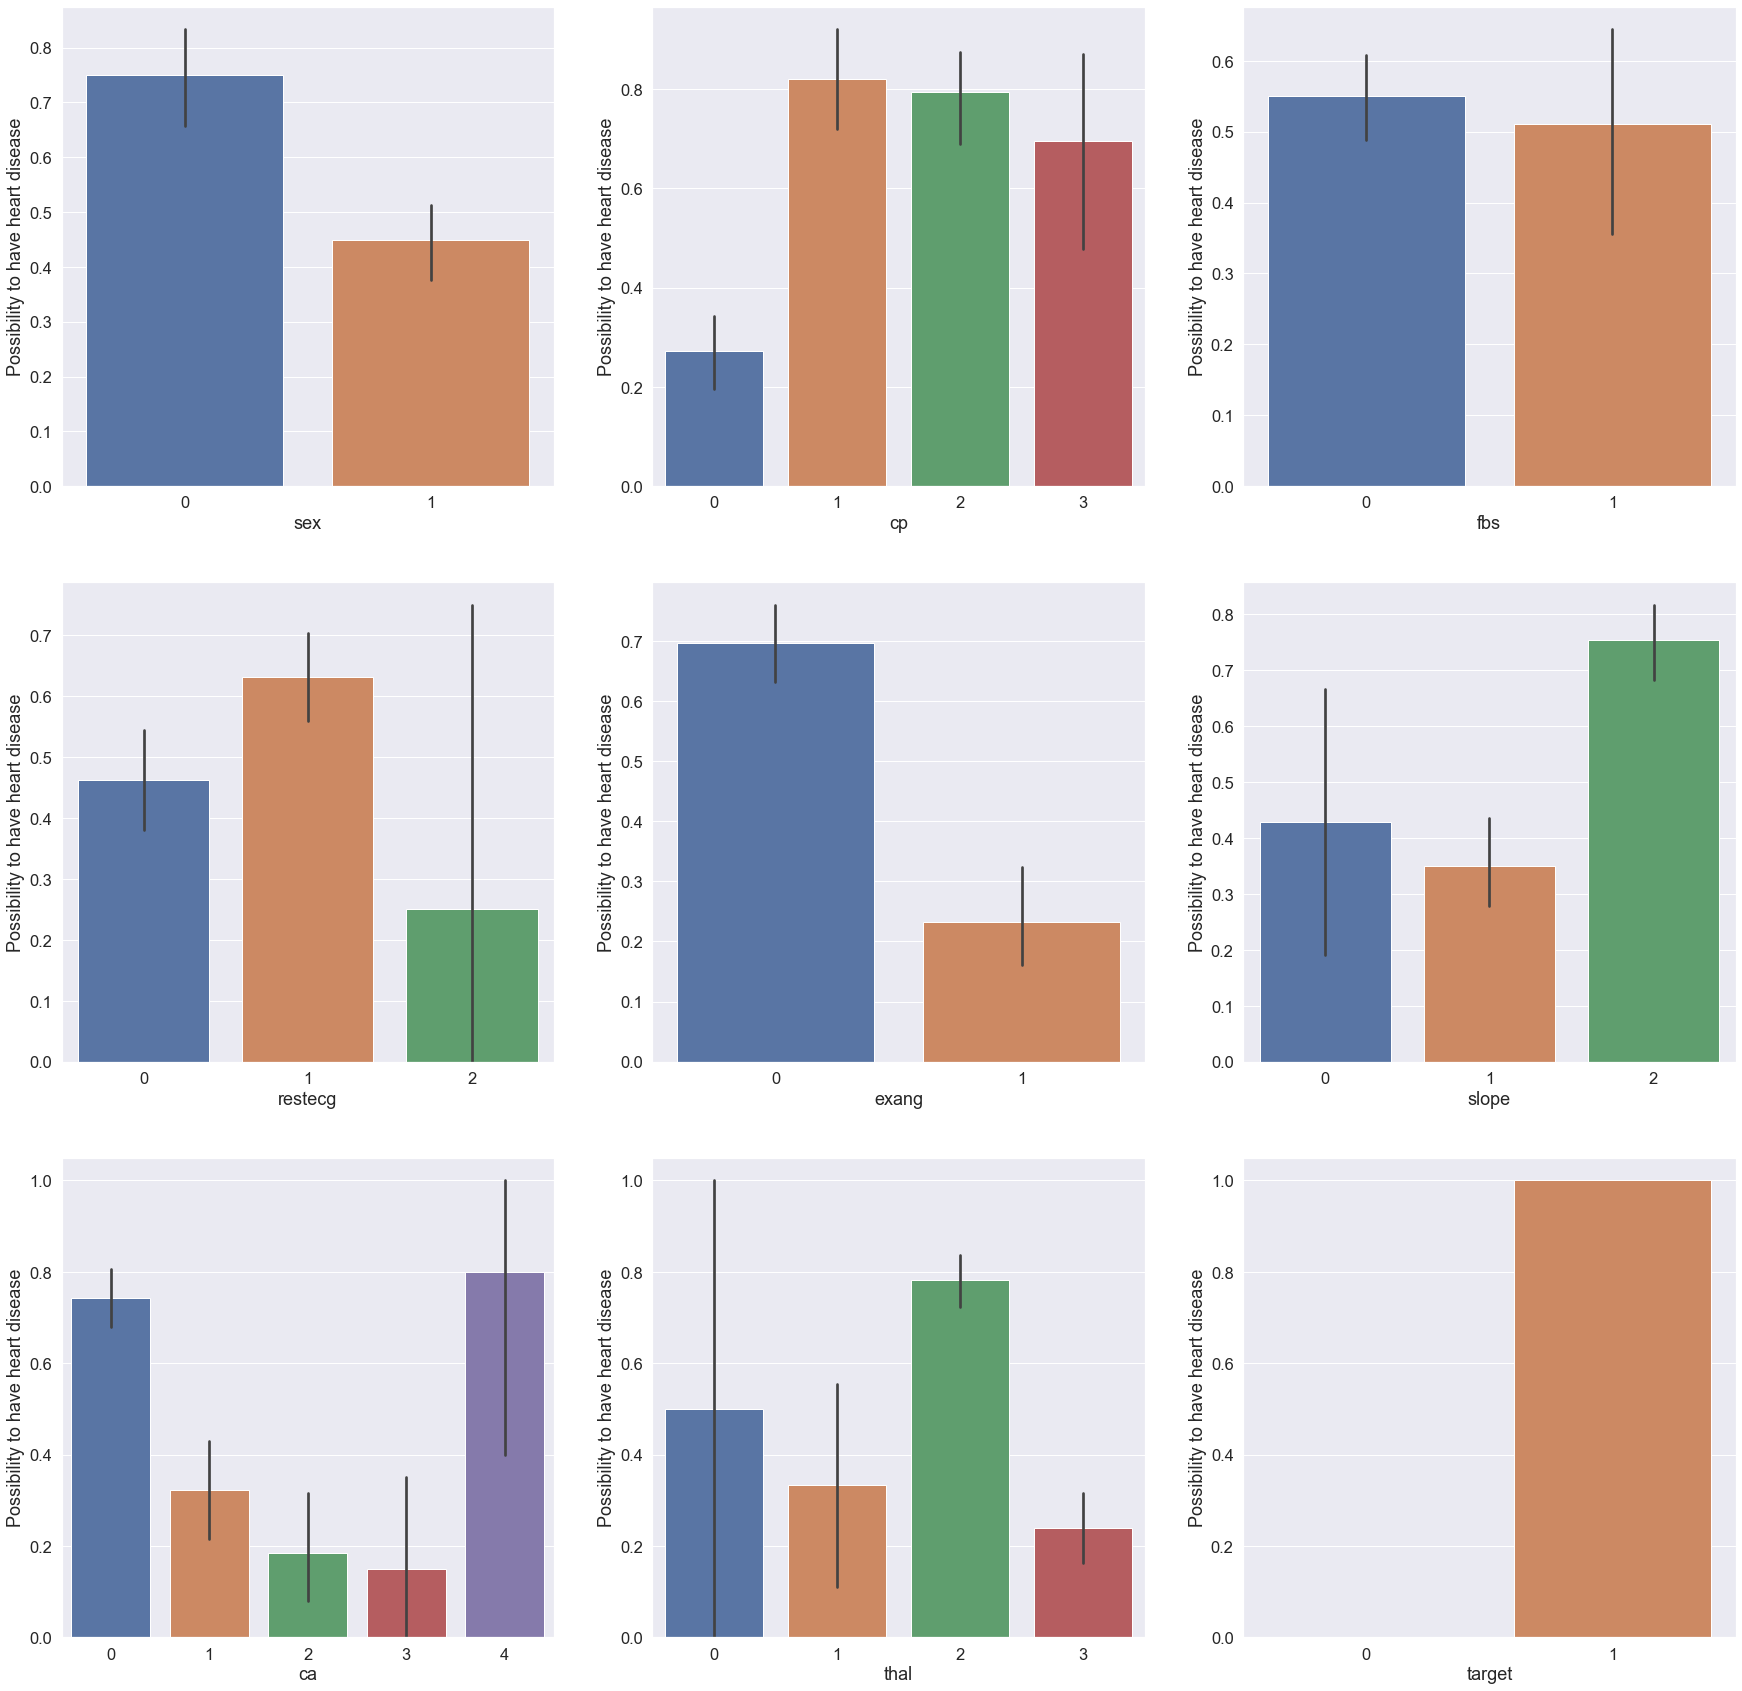

In [16]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=data)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

## 5. Correlation Matrix
The best way to compare relationship between various features is to look at the correlation matrix between those features.

<AxesSubplot:>

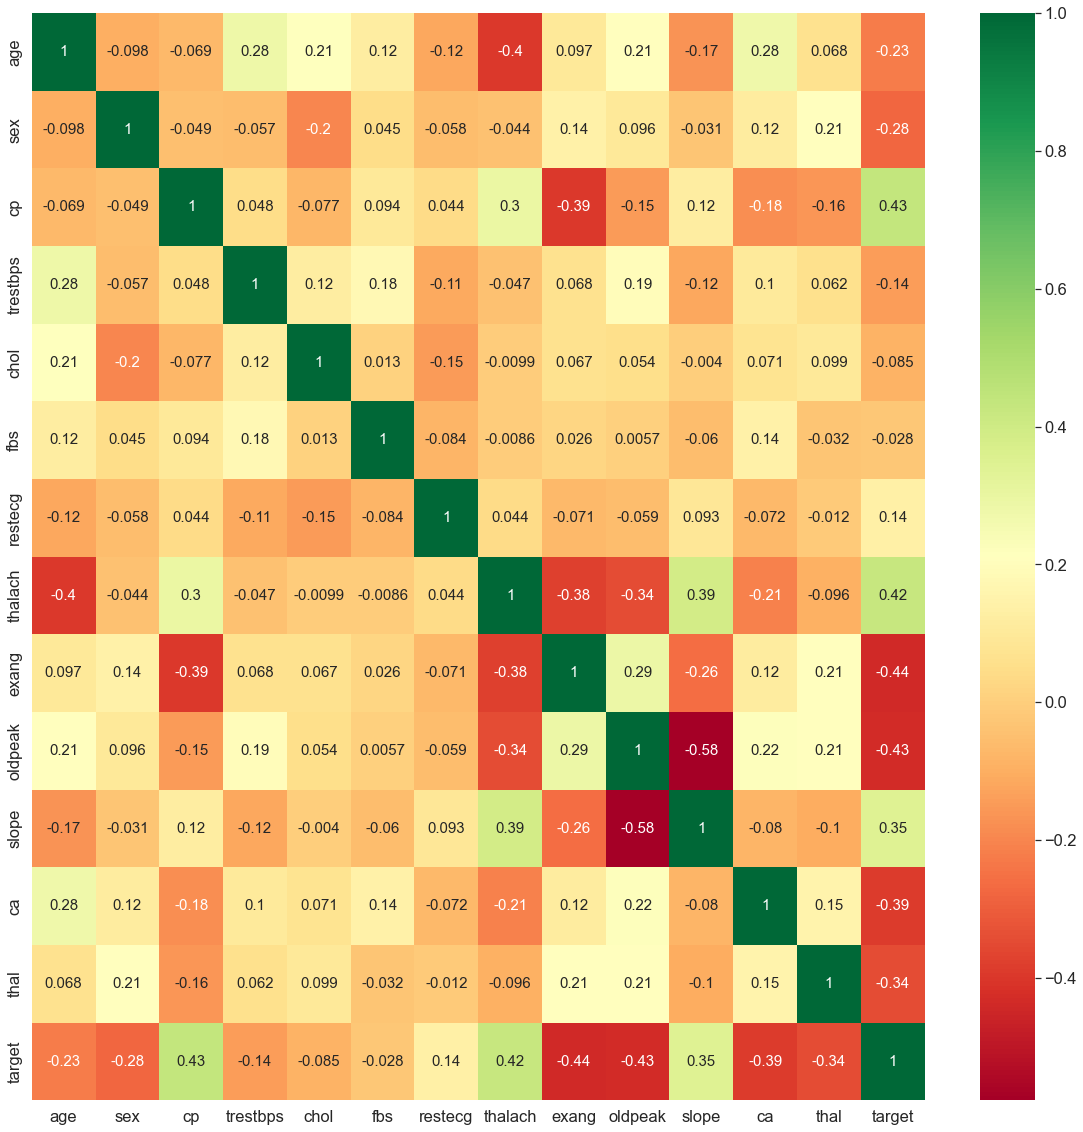

In [17]:
corr_matrix = data.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## 6. Data Processing
* We clean data, removing empty rows, and changing columns names to more understandable terms.  
* We then drop the columns which require more complex inputs to make model user-friendly.
* We then proceed to split the data in testing and training sets.

In [18]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [19]:
df = data.dropna()
df = df.drop(columns = ['oldpeak', 'slope', 'ca', 'thal', 'fbs', 'restecg', 'exang'])
df = df.rename(columns = {'age': 'age', 'sex': 'gender', 'cp': 'chest pain', 'trestbps': 'blood pressure', 'chol': 'cholestrol level', 'thalach': 'max heart rate', })
df.head()

,age,gender,chest pain,blood pressure,cholestrol level,max heart rate,target
0,63,1,3,145,233,150,1
1,37,1,2,130,250,187,1
2,41,0,1,130,204,172,1
3,56,1,1,120,236,178,1
4,57,0,0,120,354,163,1


In [20]:
df.head()

,age,gender,chest pain,blood pressure,cholestrol level,max heart rate,target
0,63,1,3,145,233,150,1
1,37,1,2,130,250,187,1
2,41,0,1,130,204,172,1
3,56,1,1,120,236,178,1
4,57,0,0,120,354,163,1


In [21]:
df = shuffle(df)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.05)

## 7. Model Training
Here we train a Logistic Regression Model to predict whether a person has a heart disease or not based on the following features:
* age
* gender	
* chest pain	
* blood pressure	
* cholesterol level	
* max heart rate

In [23]:
from sklearn.linear_model import LogisticRegression
import joblib

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
import pickle
pickle.dump(model,open('model.pkl','wb'))